In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pydicom
from pydicom import dcmread
import pandas as pd
from os.path import exists
from PIL import Image, ImageOps
import plotly.express as px
from numpy import asarray
from PIL import Image
import matplotlib.pyplot as plt



ROOT_PATH = "/Users/sdey/Documents/science_project"
MASS_TRAIN_BASE = os.path.join(ROOT_PATH,'train/mass_training_full_mamogram/manifest-Egq0PU078220738724328010106/CBIS-DDSM')

WRITE_PATH_TRAIN =os.path.join(ROOT_PATH,'preprossed/train')
WRITE_PATH_TEST =os.path.join(ROOT_PATH,'preprossed/test')
print(WRITE_PATH_TRAIN)

IMAGE_SIZE = (100,170)



/Users/sdey/Documents/science_project/preprossed/train


In [2]:
mass_train = pd.read_csv(os.path.join(ROOT_PATH, 'train/mass_case_description_train_set.csv'))

#calc_train = pd.read_csv(os.path.join(root_path, 'train/calc_case_description_train_set.csv'))

In [3]:
mass_train.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality type                          mass shape   mass margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1           4  MALIGNANT         4   
2           4     BENIGN         3   
3           4     BENIGN         3   
4           4     BENIGN         5   

                                     image file path  \
0  Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...   
1  Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...   
2  Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...   
3  Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...   
4  Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...   

                             cropped image file path  \
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...   
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...   
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....   

                                  ROI mask file path  
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...  
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...  
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....

In [4]:
print(mass_train.shape)
mass_train.columns

(1318, 14)


Index(['patient_id', 'breast_density', 'left or right breast', 'image view',
       'abnormality id', 'abnormality type', 'mass shape', 'mass margins',
       'assessment', 'pathology', 'subtlety', 'image file path',
       'cropped image file path', 'ROI mask file path'],
      dtype='object')

In [5]:
fig = px.histogram(mass_train, x='pathology')
fig.show()

In [23]:
def resize_with_padding(img, expected_size):
    img.thumbnail((expected_size[0], expected_size[1]))
    # print(img.size)
    delta_width = expected_size[0] - img.size[0]
    delta_height = expected_size[1] - img.size[1]
    pad_width = delta_width // 2
    pad_height = delta_height // 2
    padding = (pad_width, pad_height, delta_width - pad_width, delta_height - pad_height)
    return ImageOps.expand(img, padding)

def convert_dcm_jpg(im):    
    im = im.pixel_array.astype(float)
    rescaled_image = (np.maximum(im,0)/im.max())*255 # float pixels
    final_image = np.uint8(rescaled_image) # integers pixels
    final_image = Image.fromarray(final_image)
    return final_image

def get_image(img_path):
    s = img_path.split('/')[:-1]
    image_dir = '/'.join(s)
    s.append('1-1.dcm')
    image_file = '/'.join(s)

    ds = dcmread(image_file)
    return ds

MALIGNANT


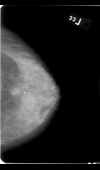

MALIGNANT


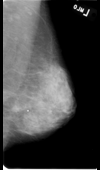

BENIGN


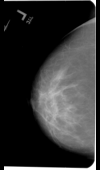

BENIGN


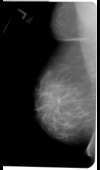

BENIGN


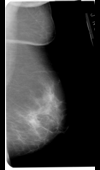

MALIGNANT


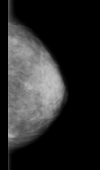

MALIGNANT


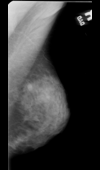

MALIGNANT


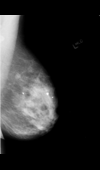

BENIGN


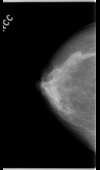

BENIGN


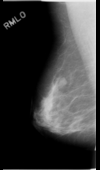

BENIGN


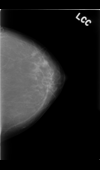

BENIGN


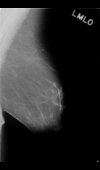

BENIGN


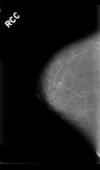

BENIGN


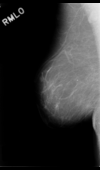

MALIGNANT


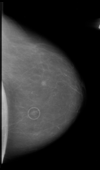

MALIGNANT


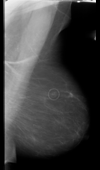

BENIGN


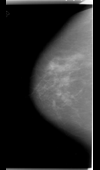

BENIGN


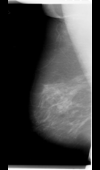

BENIGN


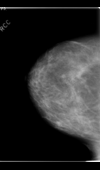

BENIGN


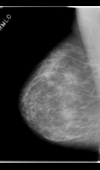

MALIGNANT


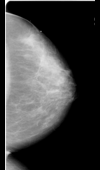

MALIGNANT


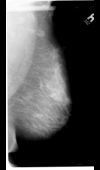

MALIGNANT


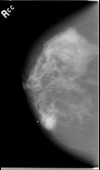

MALIGNANT


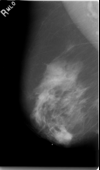

BENIGN_WITHOUT_CALLBACK


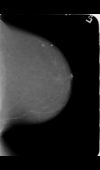

BENIGN_WITHOUT_CALLBACK


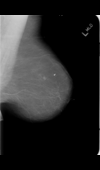

BENIGN


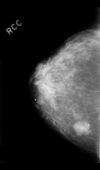

BENIGN


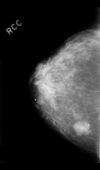

BENIGN


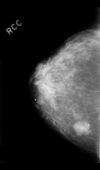

BENIGN


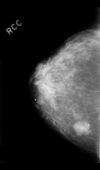

BENIGN


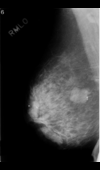

BENIGN


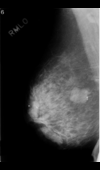

MALIGNANT


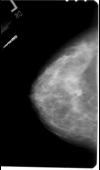

MALIGNANT


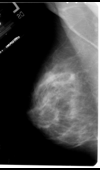

MALIGNANT


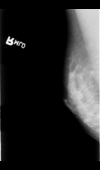

MALIGNANT


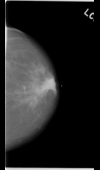

MALIGNANT


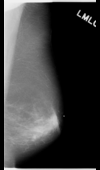

BENIGN_WITHOUT_CALLBACK


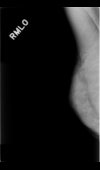

BENIGN


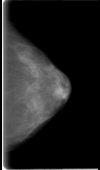

MALIGNANT


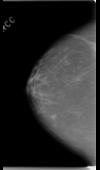

MALIGNANT


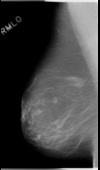

MALIGNANT


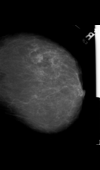

MALIGNANT


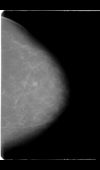

MALIGNANT


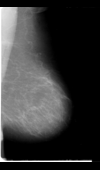

BENIGN


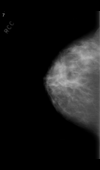

BENIGN


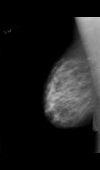

BENIGN_WITHOUT_CALLBACK


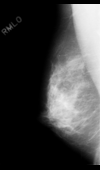

BENIGN


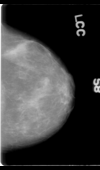

BENIGN


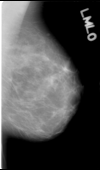

MALIGNANT


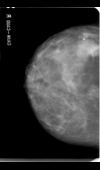

MALIGNANT


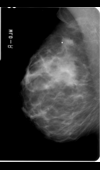

MALIGNANT


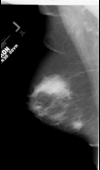

MALIGNANT


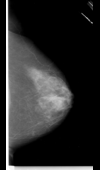

MALIGNANT


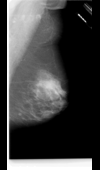

BENIGN


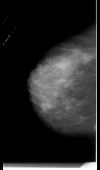

BENIGN


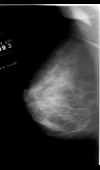

MALIGNANT


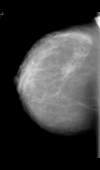

MALIGNANT


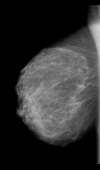

MALIGNANT


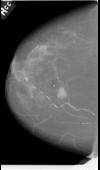

MALIGNANT


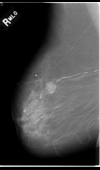

BENIGN


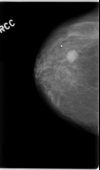

BENIGN


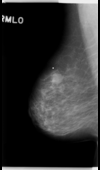

MALIGNANT


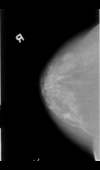

MALIGNANT


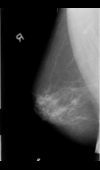

BENIGN


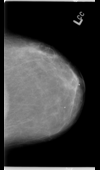

BENIGN


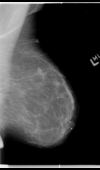

MALIGNANT


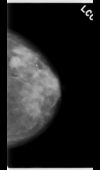

MALIGNANT


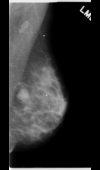

MALIGNANT


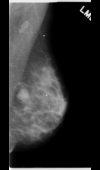

MALIGNANT


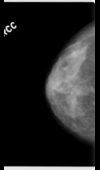

MALIGNANT


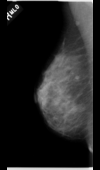

MALIGNANT


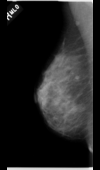

BENIGN


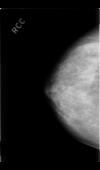

BENIGN


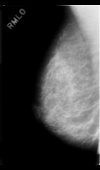

MALIGNANT


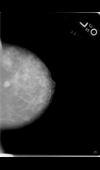

MALIGNANT


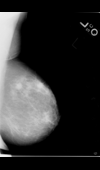

BENIGN


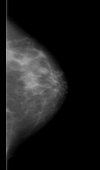

BENIGN


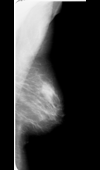

BENIGN_WITHOUT_CALLBACK


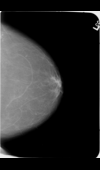

BENIGN_WITHOUT_CALLBACK


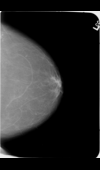

BENIGN_WITHOUT_CALLBACK


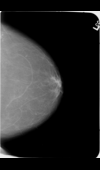

BENIGN_WITHOUT_CALLBACK


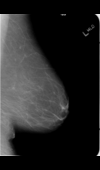

BENIGN_WITHOUT_CALLBACK


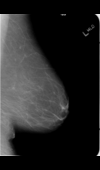

BENIGN_WITHOUT_CALLBACK


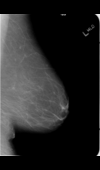

BENIGN_WITHOUT_CALLBACK


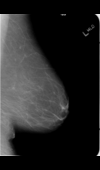

BENIGN_WITHOUT_CALLBACK


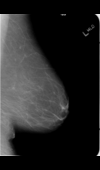

BENIGN_WITHOUT_CALLBACK


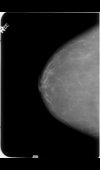

BENIGN_WITHOUT_CALLBACK


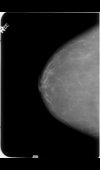

BENIGN_WITHOUT_CALLBACK


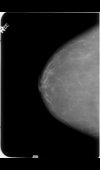

BENIGN_WITHOUT_CALLBACK


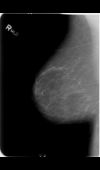

BENIGN_WITHOUT_CALLBACK


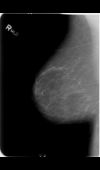

BENIGN_WITHOUT_CALLBACK


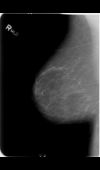

BENIGN_WITHOUT_CALLBACK


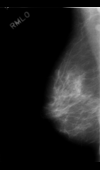

BENIGN


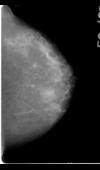

BENIGN


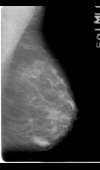

BENIGN


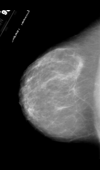

MALIGNANT


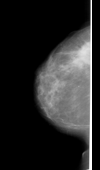

MALIGNANT


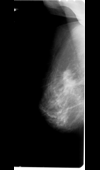

MALIGNANT


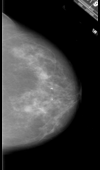

BENIGN


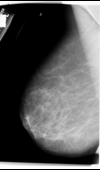

In [7]:
for i in range(100):
    row = mass_train.iloc[i]
    image_path = row['image file path']
    pathology  = row['pathology']
    dcm_image = get_image(os.path.join(MASS_TRAIN_BASE,image_path))  # get in DCM format
    
    
    dcm_image = get_image(os.path.join(MASS_TRAIN_BASE,image_path))  # get in DCM format
    jpg_image = convert_dcm_jpg(dcm_image)  # Convert to JPG

    padded_image = resize_with_padding(jpg_image, IMAGE_SIZE)  # Resize image
    rgb_image = padded_image.convert('RGB')
    print(pathology)
    if pathology == 'MALIGNANT':
        class_dir = 'MALIGNANT'
    elif pathology == 'BENIGN':
        class_dir = 'BENIGN'
    elif pathology == 'BENIGN_WITHOUT_CALLBACK':
        class_dir = 'BENIGN'
    else:
        class_dir = 'OTHER'
    file_name  = ':'.join(image_path.split('/')[0:1]) + '.jpg'
    rgb_image.save(os.path.join(WRITE_PATH_TRAIN,class_dir,file_name) )
    display(rgb_image)
    



In [25]:
os.path.join(WRITE_PATH_TRAIN,class_dir,file_name)

'/Users/sdey/Documents/science_project/preprossed/train/BENIGN/Mass-Training_P_00117_LEFT_MLO.jpg'

In [8]:
import tensorflow
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import metrics
from tensorflow.keras.optimizers import Adam 
#from keras import backend as K

from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2 as  PretrainedModel,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import ssl

In [9]:
batch_size = 32

train_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
    WRITE_PATH_TRAIN, 
    labels='inferred', 
    label_mode='categorical',
    class_names=None, 
    color_mode='grayscale', 
    batch_size=32, 
    image_size=(IMAGE_SIZE[1],IMAGE_SIZE[0]), 
    shuffle=True, 
    seed=123, 
    validation_split=0.2, 
    subset = "training",
    interpolation='nearest', 
    follow_links=False,
    crop_to_aspect_ratio=False
)

val_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
    WRITE_PATH_TRAIN, 
    labels='inferred', 
    label_mode='categorical',
    class_names=None, 
    color_mode='grayscale', 
    batch_size=32, 
    image_size=(IMAGE_SIZE[1],IMAGE_SIZE[0]), 
    shuffle=True, 
    seed=123, 
    validation_split=0.2, 
    subset="validation",
    interpolation='nearest', 
    follow_links=False,
    crop_to_aspect_ratio=False
)





Found 84 files belonging to 2 classes.
Using 68 files for training.
Found 84 files belonging to 2 classes.
Using 16 files for validation.


2022-02-23 10:12:23.351970: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
train_ds.class_names

['BENIGN', 'MALIGNANT']

In [11]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)

2022-02-23 10:12:23.789077: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


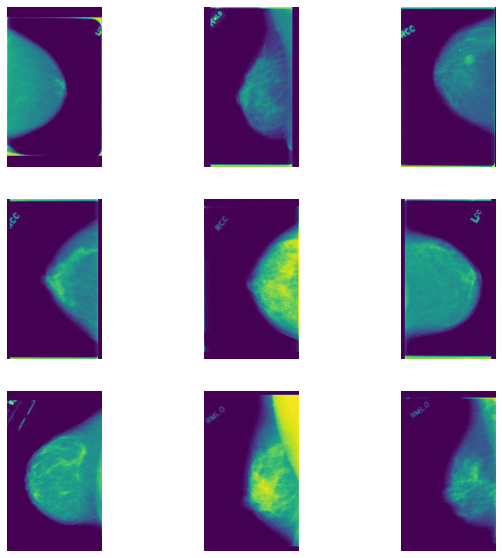

In [12]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy())
   # plt.title(class_names[labels[i]])
    plt.axis("off")


In [13]:
ssl._create_default_https_context = ssl._create_unverified_context


def create_model(input_shape, n_out):
    
    pretrain_model = InceptionResNetV2(
        include_top=False, 
        weights='imagenet', 
        input_shape=input_shape)    
    
    input_tensor = Input(shape=input_shape)
    bn = BatchNormalization()(input_tensor)
    x = pretrain_model(bn)
    x = Conv2D(128, kernel_size=(1,1), activation='relu')(x)
    x = Flatten()(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(n_out, activation='sigmoid')(x)
    model = Model(input_tensor, output)
    
    return model

#keras.backend.clear_session()

model = create_model(
    input_shape = (IMAGE_SIZE[1],IMAGE_SIZE[0],3), 
    n_out=2)

model.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 170, 100, 3)]     0         
                                                                 
 batch_normalization_203 (Ba  (None, 170, 100, 3)      12        
 tchNormalization)                                               
                                                                 
 inception_resnet_v2 (Functi  (None, 3, 1, 1536)       54336736  
 onal)                                                           
                                                                 
 conv2d_203 (Conv2D)         (None, 3, 1, 128)         196736    
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dropout (Dropout)           (None, 384)               0     

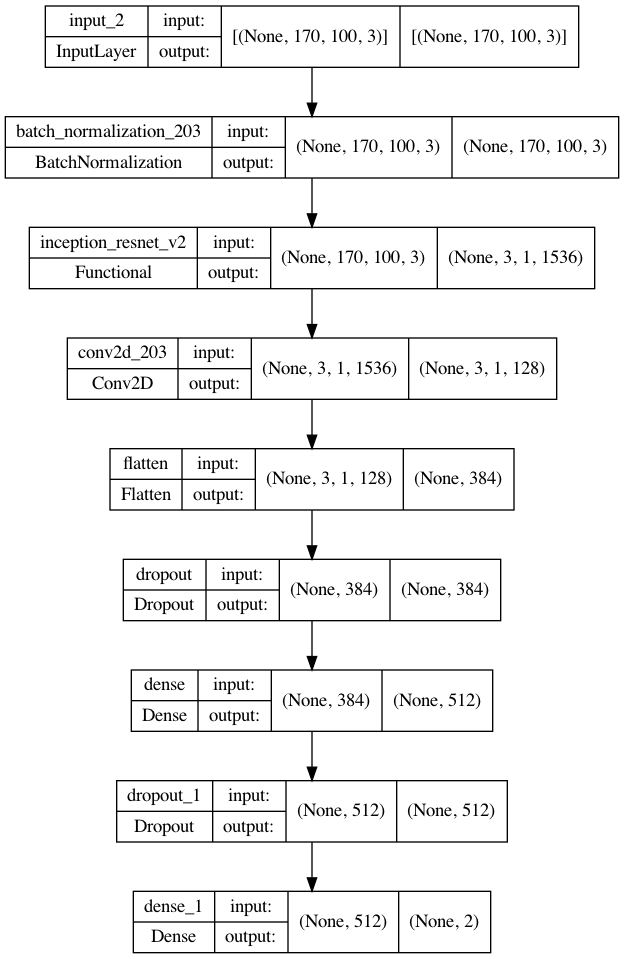

In [14]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [15]:
model.compile(
    loss='binary_crossentropy',  
    optimizer=Adam(1e-3),
    metrics=['acc'])


In [16]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)


Epoch 1/3


ValueError: in user code:

    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/input_spec.py", line 248, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "model" (type Functional).
    
    Input 0 of layer "batch_normalization_203" is incompatible with the layer: expected axis 3 of input shape to have value 3, but received input with shape (None, 170, 100, 1)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 170, 100, 1), dtype=uint8)
      • training=True
      • mask=None


In [ ]:
checkpointer = ModelCheckpoint(
    '"/Users/sdey/Documents/science_project/InceptionResNetV2.model',
    verbose=2, save_best_only=True)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    validation_data=next(validation_generator),
    epochs=15, 
    verbose=1,
    callbacks=[checkpointer])


In [18]:
im = '/Users/sdey/Documents/science_project/preprossed/train/BENIGN/Mass-Training_P_00117_LEFT_MLO.jpg'

In [20]:
m = Image.open(im)

In [22]:
m.size

(100, 170)

In [27]:
rgb_image = m.convert('RGB')

In [28]:
rgb_image.size

(100, 170)

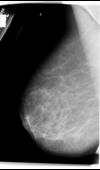

In [30]:
display(rgb_image)